In [2]:
import pprint
import google.generativeai as palm
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
import sys
sys.path.append('../app')  
import config
import importlib
importlib.reload(config)

<module 'config' from 'c:\\Users\\TurnerZ\\Documents\\GitHub\\AeroReview_Explorer\\notebooks\\../app\\config.py'>

In [177]:
palm.configure(api_key=config.api_key)

In [142]:
# find available models
models = [m for m in palm.list_models() if 'generateText' in m.supported_generation_methods]
model = models[0].name
print(model)

models/text-bison-001


In [103]:
all_reviews = pd.read_csv("../data/clean_all_reviews.csv")
verified_reviews = pd.read_csv("../data/clean_verified_reviews.csv")

In [133]:
len(verified_reviews)

797

In [179]:
reviews = list(verified_reviews['reviews'])
# reviews = reviews[100:300]
# reviews = reviews[300:400]
# reviews = reviews[400:500]
# reviews = reviews[500:600]
# reviews = reviews[600:700]
# reviews = reviews[700:]
reviews = reviews[:50]
len(reviews)

50

In [180]:
# Initialize batch size
batch_size = 1  # You can adjust the batch size as needed
sentiments = []

# Iterate through the reviews in batches
for i in range(0, len(reviews), batch_size):
    # Create a batch of reviews
    batch_reviews = reviews[i:i + batch_size]

    # Initialize the prompt with the expert's introduction
    prompt = "You are an expert at sentiment analysis.\n\n"

    # Iterate through each review in the batch and add it to the prompt
    for idx, review in enumerate(batch_reviews):
        prompt += f"Review {i + idx + 1}:\n{review}\n\n"

    # Add instructions to return Positive, Negative, or Neutral for each review
    prompt += "Return the sentiment (Positive, Negative, or Neutral) for each review:\n"

    response  = palm.generate_text(
    model=model,
    prompt=prompt,
    temperature=0,
)

    # Extract the sentiment analysis results from the API response
    sentiments.append(response.result) 


In [181]:
from collections import Counter
counts = Counter(sentiments)
counts

Counter({'Negative': 42, 'Positive': 7, None: 1})

In [182]:
review_sentiment = list(zip(reviews, sentiments))
review_sentiment_df = pd.DataFrame(review_sentiment, columns=['reviews', 'sentiments'])
review_sentiment_df.head()

,reviews,sentiments
0,this is to express our displeasure and concern...,Negative
1,i flew london to malaga on 27 august in club e...,Negative
2,i arrived at the airport about 2.5 hours befor...,Negative
3,"filthy plane, cabin staff ok, appalling custom...",Negative
4,chaos at terminal 5 with ba cancellations and ...,Negative


In [183]:
review_sentiment_df.to_csv('../data/review_sentiment_df.csv', mode='a', header=False, index=False)

In [4]:
def plot_polarity(df, text):
    # Count the occurrences of each sentiment
    sentiment_counts = df.value_counts()
    print(sentiment_counts)
    fig, ax = plt.subplots()
    ax.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
    ax.set_title(f'Sentiment Distribution for {text}')
    plt.show()

In [3]:
df = pd.read_csv('../data/review_sentiment_df.csv')
len(df)

747

sentiments
Negative    475
Positive    217
Neutral       1
Name: count, dtype: int64


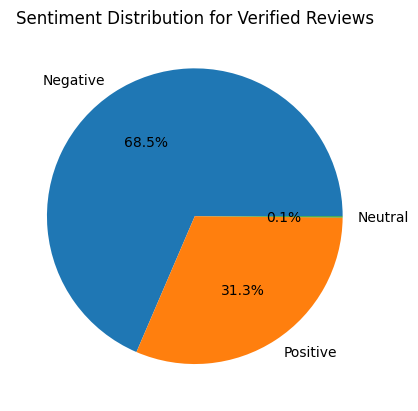

In [5]:
plot_polarity(df['sentiments'], 'Verified Reviews')